In [74]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import tqdm
import os

(64, 64, 3)
0
(64, 64, 3)
1
(64, 64, 3)
2
(64, 64, 3)
3
(64, 64, 3)
4
(64, 64, 3)
5
(64, 64, 3)
6
(64, 64, 3)
7
(64, 64, 3)
8
(64, 64, 3)
9


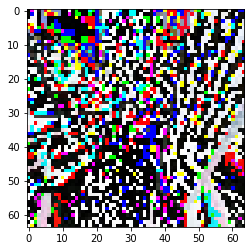

In [105]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
#video number 1
x_img = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[0]
#first 100 frames of the video
x_img = np.array(x_img).reshape(1832, 64, 64, 3).astype(np.uint8)
x_img = x_img[-1792:][:11]
imgs = []
for i in range(10):
    difference = np.array(x_img[i+1]-x_img[i])
    print(difference.shape)
    #difference = Image.fromarray(difference, "RGB")
    imgs.append(difference)
    print(i)
imgs = np.array(imgs).reshape(10,64,64,3)
plt.imshow(imgs[-1])
plt.show()

In [106]:
y_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[1]
y_label = y_label[3:][0][:10]
print(np.array(y_label).shape)


(10,)


In [107]:
diff_img_correlator = keras.models.Sequential([
    keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", activation="tanh", input_shape=[64,64,3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, padding="same", activation="sigmoid"),
    keras.layers.Flatten(),
    keras.layers.Dense(32),
    keras.layers.Dense(1)
])

diff_img_correlator.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam())
history = diff_img_correlator.fit(imgs, y_label, epochs=50, validation_data=(imgs, y_label))

Epoch 1/50
1/1 [==============================] - 1s 614ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 2/50
1/1 [==============================] - 0s 219ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 3/50
1/1 [==============================] - 0s 175ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 4/50
1/1 [==============================] - 0s 160ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 5/50
1/1 [==============================] - 0s 156ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 6/50
1/1 [==============================] - 0s 141ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 7/50
1/1 [==============================] - 0s 148ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 8/50
1/1 [==============================] - 0s 131ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 9/50
1/1 [==============================] - 0s 128ms/step - loss: 1.1921e-07 - val_loss: 1.1921e-07
Epoch 10/50
1/1 [=============================